In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

### Data Selection

We’ll primarily work with 'bank-full.csv' as it contains the full data with the most features. We’ll use the smaller datasets for validation or testing if needed.

In [10]:
# File path
file_path = 'data/bank-full.csv'

# Load dataset
bank_data = pd.read_csv(file_path)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
bank_data.shape


(45211, 17)

###  Data Cleaning

In [ ]:
# no null values in dataset and all datatypes are in the  correct format

bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
# Check for missing values
missing_values = bank_data.isnull().sum()

# Display the results
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [15]:
# Check for duplicate rows
duplicates = bank_data.duplicated().sum()

# Display the result
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


no duplicates
no missing values 

### EDA


In [18]:
# summary statistics
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### I examine the distribution of the target variable, which indicates whether the client subscribed to a term deposit ("yes" or "no")

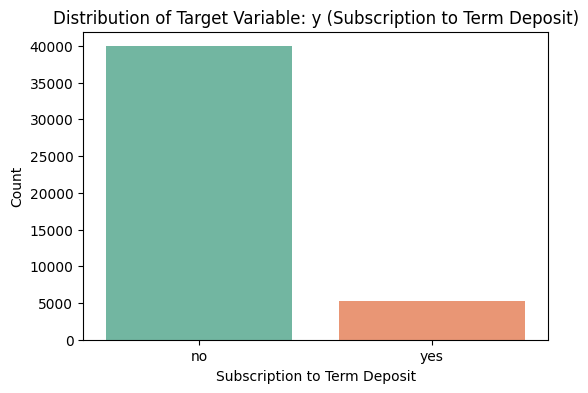

Target variable distribution (normalized):
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [17]:
# Plot the distribution of the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=bank_data, palette='Set2')
plt.title('Distribution of Target Variable: y (Subscription to Term Deposit)')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count')
plt.show()

# Check the proportion of yes/no
target_distribution = bank_data['y'].value_counts(normalize=True)
print("Target variable distribution (normalized):")
print(target_distribution)


 This gives us insights into how balanced the target classes are precisely the proportion of clients who subscribed vs. those who did not

I visualize the relationships between various features and the target variable. For numerical features